In [3]:
!pip install pycaret

     |████████████████████████████████| 264 kB 4.0 MB/s 
     |████████████████████████████████| 167 kB 52.4 MB/s 
     |████████████████████████████████| 14.6 MB 113 kB/s 
     |████████████████████████████████| 1.3 MB 50.1 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 6.8 MB 56.7 MB/s 
     |████████████████████████████████| 111 kB 60.9 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 2.0 MB 39.4 MB/s 
     |████████████████████████████████| 1.7 MB 43.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 248 kB 63.3 MB/s 
     |████████████████████████████████| 271 kB 47.8 MB/s 
     |████████████████████████████████| 3.1 MB 50.2 MB/s 
     |████████████████████████████████| 675 kB 36.7 MB/s 
     |██████████████████

In [4]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 30 kB/s 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
from pycaret.regression import *
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
import matplotlib

import platform
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Darwin': # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else:
    matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.style.use('ggplot')

In [66]:
train_df = pd.read_csv('/content/drive/MyDrive/bigcon/final_final_train_0913.csv',index_col=0)

In [67]:
train_df

,base_date,emd_nm,em_g,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop
0,2018-01-01,전체,85755000,679922,535888.570169,3.786578e+09,20891720.0,1.602637e+09,108983.0,1057.0,40848.0,32512,7.210523e+06,8.301891e+05,54466.952499,2215.223209
1,2018-01-02,전체,90217650,679922,534509.814556,3.406059e+09,15597155.0,1.286966e+09,107164.0,839.0,38738.0,34664,6.761153e+06,1.368438e+06,53973.690842,2221.350506
2,2018-01-03,전체,80277600,679922,532472.061474,3.499232e+09,13453350.0,1.292679e+09,109765.0,728.0,38284.0,31025,6.770127e+06,1.369782e+06,53705.165769,2172.085577
3,2018-01-04,전체,80138700,679922,514678.201983,3.329829e+09,14592029.0,1.215080e+09,107110.0,740.0,36878.0,31540,6.993326e+06,1.351504e+06,53151.118467,2111.044522
4,2018-01-05,전체,75798600,679922,527383.565802,3.733755e+09,21105231.0,1.290936e+09,112064.0,1009.0,37686.0,29709,6.825653e+06,1.317354e+06,53360.869746,2055.834760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50881,2021-06-30,표선면,1377450,12681,10137.380983,9.063287e+07,1855783.0,3.831039e+07,1336.0,75.0,423.0,370,1.614560e+05,2.405863e+04,914.664667,12.910869
50882,2021-06-30,한경면,973850,9495,7257.895822,4.526361e+07,697661.0,1.767975e+07,1286.0,40.0,423.0,269,1.041218e+05,1.633182e+04,608.427552,22.165953
50883,2021-06-30,한림읍,3298100,24462,20632.727912,1.301568e+08,5508665.0,4.207137e+07,3044.0,257.0,669.0,870,3.018026e+05,5.060204e+04,2064.041876,48.329788
50884,2021-06-30,화북동,3749600,24630,24117.268821,1.918163e+08,13370520.0,4.846083e+07,5644.0,644.0,1645.0,2255,2.433203e+05,5.097469e+04,1810.431884,18.483512


# Summary
- Auto ML을 다룬 데이콘 게시글에서는 대부분 변수를 추가로 만들지 않았기 때문에 feature1에서 feature selection로만 돌려본 다음 파생변수를 추가하여 튜닝한 결과와 비교해 볼 것.
- 데이콘에서 코드에 비해 Boosting, Stacking, Bagging 등의 기법을 추가

# 모델 생성 후 성능 비교

In [90]:
df = train_df[train_df['emd_nm'] == '건입동'].set_index('base_date')
df.drop(columns=['emd_nm'],inplace=True)
scaler = RobustScaler()
# 스케일을 적용할 column을 정의합니다.
y = df[['em_g']].reset_index(drop=True)
scale_cols = df.columns[1:]
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])
df = pd.DataFrame(scaled, columns=scale_cols)
df = df.reset_index()

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.2, random_state=0, shuffle=False)
train = pd.concat([X_train, y_train], axis = 1)

In [93]:
clf = setup(data=train,
            target='em_g',
            silent=True,
            fold = 5)

,Description,Value
0,session_id,8889
1,Target,em_g
2,Original Data,"(1020, 15)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(713, 13)"


In [94]:
best_3 = compare_models(sort = 'RMSE', n_select = 3, fold=5)
print(best_3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,81382.0280,1.088424e+10,104031.7563,0.8246,0.0770,0.0576,0.556
gbr,Gradient Boosting Regressor,80241.6202,1.100059e+10,104473.8978,0.8225,0.0769,0.0563,0.196
catboost,CatBoost Regressor,81360.2243,1.112076e+10,105091.2930,0.8210,0.0808,0.0580,4.498
rf,Random Forest Regressor,84896.5106,1.189778e+10,108831.2506,0.8075,0.0796,0.0599,0.716
lightgbm,Light Gradient Boosting Machine,85681.1299,1.233803e+10,110380.2865,0.8024,0.0818,0.0604,0.186
br,Bayesian Ridge,98823.7117,1.576899e+10,125218.5051,0.7451,0.0888,0.0687,0.018
ridge,Ridge Regression,98949.3859,1.578749e+10,125307.3438,0.7447,0.0887,0.0688,0.016
lar,Least Angle Regression,99591.2436,1.577914e+10,125379.1422,0.7445,0.0881,0.0690,0.028
llar,Lasso Least Angle Regression,99070.2752,1.581253e+10,125417.6396,0.7443,0.0888,0.0689,0.020
lasso,Lasso Regression,99081.4875,1.581534e+10,125430.0203,0.7442,0.0888,0.0689,0.018


[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=8889, verbose=0, warm_start=False), GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
  

# 모델 튜닝 후 성능 비교

In [97]:
tuned_models = []

## 1. 단일 모델
catboost / Gradient Boosting / LGBM

In [98]:
# extra tree
model_01 = create_model('et')
model_01 = tune_model(model_01, fold= 5, n_iter = 100, optimize = 'RMSE', verbose = True, choose_better = True)
tuned_models.append(model_01)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,85443.3893,1.209359e+10,109970.8790,0.8020,0.0882,0.0638
1,79791.6093,1.046766e+10,102311.5711,0.8044,0.0692,0.0547
2,83033.6671,1.153016e+10,107378.5956,0.8202,0.0977,0.0637
3,86157.0431,1.192595e+10,109206.0207,0.8001,0.0757,0.0598
4,100140.8938,1.657870e+10,128758.2817,0.7653,0.0831,0.0668
Mean,86913.3205,1.251921e+10,111525.0696,0.7984,0.0828,0.0618
SD,6978.1348,2.107112e+09,9020.6308,0.0180,0.0099,0.0042


In [99]:
# catboost
model_02 = create_model('catboost')
model_02 = tune_model(model_02, fold= 5, n_iter = 100, optimize = 'RMSE', verbose = True, choose_better = True)
tuned_models.append(model_02)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,84253.7726,1.090589e+10,104431.2800,0.8215,0.0840,0.0624
1,75533.9090,8.743842e+09,93508.5105,0.8366,0.0637,0.0513
2,70265.2457,8.755963e+09,93573.3014,0.8634,0.0872,0.0539
3,80350.0046,1.060799e+10,102995.1066,0.8222,0.0701,0.0549
4,92856.1402,1.417801e+10,119071.4606,0.7993,0.0793,0.0623
Mean,80651.8144,1.063834e+10,102715.9318,0.8286,0.0769,0.0570
SD,7695.2521,1.986668e+09,9368.9698,0.0211,0.0087,0.0045


In [100]:
# gbr
model_03 = create_model('gbr')
model_03 = tune_model(model_03, fold= 5, n_iter = 100, optimize = 'RMSE', verbose = True, choose_better = True)
tuned_models.append(model_03)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,86577.5716,1.220095e+10,110457.9293,0.8003,0.0887,0.0643
1,75829.7326,8.763118e+09,93611.5255,0.8363,0.0651,0.0521
2,70820.1653,8.398750e+09,91644.6954,0.8690,0.0807,0.0529
3,87357.1177,1.282781e+10,113259.9238,0.7850,0.0761,0.0594
4,97693.3170,1.574021e+10,125460.0060,0.7771,0.0851,0.0660
Mean,83655.5808,1.158617e+10,106886.8160,0.8135,0.0791,0.0589
SD,9437.0465,2.731482e+09,12703.4509,0.0344,0.0082,0.0057


## 2. 앙상블

In [101]:
prediction_models = []

### 배깅

In [102]:
bag_01_15 = ensemble_model(model_01, n_estimators = 15, fold=5, optimize = 'RMSE')
prediction_models.append(bag_01_15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,84273.6872,1.152056e+10,107333.8805,0.8114,0.0871,0.0628
1,78096.2210,9.618381e+09,98073.3434,0.8203,0.0667,0.0538
2,77633.0944,1.027049e+10,101343.4113,0.8398,0.0916,0.0593
3,82643.2826,1.104981e+10,105118.0636,0.8148,0.0732,0.0574
4,95104.9754,1.502108e+10,122560.5265,0.7873,0.0791,0.0636
Mean,83550.2521,1.149606e+10,106885.8451,0.8147,0.0795,0.0594
SD,6318.4934,1.879002e+09,8454.5867,0.0169,0.0090,0.0036


In [103]:
bag_02_15 = ensemble_model(model_02, n_estimators = 15, fold=5, optimize = 'RMSE')
prediction_models.append(bag_02_15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,82931.6626,1.112010e+10,105451.8619,0.8179,0.0862,0.0618
1,73110.2396,8.429354e+09,91811.5149,0.8425,0.0620,0.0494
2,72165.0718,8.665574e+09,93089.0661,0.8648,0.0822,0.0542
3,81937.3321,1.117157e+10,105695.6685,0.8128,0.0723,0.0562
4,96368.7690,1.474510e+10,121429.3900,0.7912,0.0804,0.0646
Mean,81302.6150,1.082634e+10,103495.5003,0.8259,0.0766,0.0572
SD,8725.3122,2.279324e+09,10724.7553,0.0254,0.0086,0.0054


In [104]:
bag_03_15 = ensemble_model(model_03, n_estimators = 15, fold=5, optimize = 'RMSE')
prediction_models.append(bag_03_15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,84434.8987,1.156363e+10,107534.3402,0.8107,0.0880,0.0632
1,76545.3421,9.380729e+09,96854.1655,0.8247,0.0646,0.0517
2,77247.4569,9.810600e+09,99048.4749,0.8470,0.0863,0.0575
3,83356.7526,1.154821e+10,107462.5754,0.8064,0.0729,0.0570
4,96601.1712,1.499651e+10,122460.2185,0.7877,0.0804,0.0651
Mean,83637.1243,1.145993e+10,106671.9549,0.8153,0.0784,0.0589
SD,7209.7543,1.978346e+09,9001.6053,0.0198,0.0087,0.0048


### 부스팅

In [105]:
boo_01 = ensemble_model(model_01, method = 'Boosting', fold=5, optimize = 'RMSE')
prediction_models.append(boo_01)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,85031.2238,1.130613e+10,106330.2779,0.8149,0.0831,0.0627
1,75660.8217,9.167535e+09,95747.2480,0.8287,0.0647,0.0519
2,77969.2727,1.021330e+10,101060.8897,0.8407,0.0912,0.0597
3,83954.1268,1.105176e+10,105127.3661,0.8148,0.0732,0.0585
4,92447.8697,1.420833e+10,119198.6910,0.7988,0.0777,0.0620
Mean,83012.6629,1.118941e+10,105492.8945,0.8196,0.0780,0.0589
SD,5890.1515,1.684470e+09,7788.5040,0.0142,0.0089,0.0038


In [106]:
boo_02 = ensemble_model(model_02, method = 'Boosting', fold=5, optimize = 'RMSE')
prediction_models.append(boo_02)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,83685.0355,1.141702e+10,106850.4556,0.8131,0.0875,0.0626
1,75828.4207,8.812461e+09,93874.7078,0.8353,0.0646,0.0520
2,72255.1916,8.931045e+09,94504.2043,0.8607,0.0854,0.0546
3,84126.7510,1.129628e+10,106283.9734,0.8107,0.0731,0.0579
4,96264.5373,1.427794e+10,119490.3492,0.7979,0.0802,0.0648
Mean,82431.9872,1.094695e+10,104200.7380,0.8235,0.0782,0.0584
SD,8281.9811,2.002920e+09,9442.2746,0.0222,0.0084,0.0048


In [107]:
boo_03 = ensemble_model(model_03, method = 'Boosting', fold=5, optimize = 'RMSE')
prediction_models.append(boo_03)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,87236.9753,1.216379e+10,110289.5925,0.8009,0.0893,0.0650
1,75132.3492,8.917241e+09,94431.1458,0.8334,0.0638,0.0512
2,73949.3068,9.439507e+09,97157.1251,0.8528,0.0870,0.0556
3,84050.2269,1.144799e+10,106995.2836,0.8081,0.0731,0.0575
4,97187.0701,1.441101e+10,120045.8584,0.7960,0.0804,0.0656
Mean,83511.1856,1.127591e+10,105783.8011,0.8182,0.0787,0.0590
SD,8518.6421,1.979014e+09,9257.1966,0.0216,0.0093,0.0056


### 스태킹

In [108]:
stactking = stack_models(estimator_list=[model_01, model_02, model_03],  meta_model = model_02, fold=5, optimize='RMSE')
prediction_models.append(stactking)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,80934.9918,1.063889e+10,103144.9992,0.8258,0.0762,0.0584
1,74031.6053,8.455769e+09,91955.2577,0.8420,0.0628,0.0505
2,75158.5755,9.366540e+09,96780.8859,0.8539,0.0837,0.0567
3,86540.4412,1.231259e+10,110962.1227,0.7936,0.0763,0.0590
4,91535.5606,1.433760e+10,119739.7359,0.7970,0.0827,0.0614
Mean,81640.2349,1.102228e+10,104516.6003,0.8225,0.0763,0.0572
SD,6668.2833,2.103888e+09,9927.7239,0.0239,0.0075,0.0037


### 블렌딩

In [109]:
blended = blend_models(estimator_list = best_3, fold = 5)
prediction_models.append(blended)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,78063.2091,1.036162e+10,101792.0343,0.8304,0.0845,0.0586
1,71953.1046,8.192450e+09,90512.1547,0.8469,0.0610,0.0491
2,71811.3451,9.149533e+09,95653.1888,0.8573,0.0884,0.0550
3,79394.5566,1.036467e+10,101807.0344,0.8263,0.0690,0.0544
4,89964.9730,1.344138e+10,115936.9620,0.8097,0.0762,0.0604
Mean,78237.4377,1.030193e+10,101140.2748,0.8341,0.0758,0.0555
SD,6628.6028,1.768704e+09,8519.1122,0.0166,0.0100,0.0039


## 3. 모델 튜닝 결과

In [110]:
for model in tuned_models:
    print(model.__class__.__name__)
    display(predict_model(model))

ExtraTreesRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,70289.3404,8.673698e+09,93132.6896,0.8396,0.0618,0.0478


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1387506.0
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1219596.0
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1606857.0
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1663400.0
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1447112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1323485.5
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1638059.5
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1424785.0
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1629588.0


CatBoostRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,67603.5289,8.264933e+09,90911.6793,0.8471,0.0613,0.0463


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1.429971e+06
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1.254624e+06
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1.541899e+06
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1.601641e+06
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1.370697e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1.331348e+06
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1.534092e+06
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1.378488e+06
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1.647866e+06


GradientBoostingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,68837.7787,8.271898e+09,90949.9763,0.847,0.0627,0.0475


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1.432099e+06
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1.280417e+06
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1.539006e+06
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1.586598e+06
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1.438962e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1.346296e+06
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1.604646e+06
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1.365926e+06
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1.644431e+06


In [111]:
for model in prediction_models:
    print(model.__class__.__name__)
    display(predict_model(model))

BaggingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,70826.4653,9.184503e+09,95835.8104,0.8301,0.0635,0.0483


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1.392249e+06
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1.243195e+06
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1.606200e+06
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1.637914e+06
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1.453123e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1.325917e+06
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1.639309e+06
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1.425888e+06
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1.667687e+06


BaggingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,67842.8291,8.385963e+09,91574.9016,0.8449,0.0619,0.0466


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1.425674e+06
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1.272788e+06
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1.544410e+06
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1.599684e+06
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1.394488e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1.318375e+06
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1.578261e+06
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1.393245e+06
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1.658164e+06


BaggingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,68635.1839,8.772801e+09,93663.2295,0.8377,0.0632,0.0472


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1.424213e+06
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1.270263e+06
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1.564143e+06
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1.602421e+06
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1.435196e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1.311474e+06
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1.590513e+06
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1.397382e+06
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1.662468e+06


AdaBoostRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,72698.272,9.117811e+09,95487.2296,0.8313,0.0639,0.0499


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1402922.0
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1239012.5
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1606958.0
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1634940.0
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1436019.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1332788.5
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1632759.0
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1413339.5
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1638632.0


AdaBoostRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,71190.0971,8.680059e+09,93166.8325,0.8394,0.0624,0.0487


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1.442645e+06
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1.252668e+06
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1.543219e+06
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1.618722e+06
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1.363439e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1.345368e+06
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1.582305e+06
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1.373221e+06
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1.656617e+06


AdaBoostRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,70347.2543,8.980828e+09,94767.2301,0.8339,0.0633,0.0481


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1.435708e+06
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1.248085e+06
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1.553174e+06
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1.608752e+06
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1.421316e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1.334100e+06
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1.632213e+06
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1.370038e+06
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1.678998e+06


StackingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,69253.2757,8.307998e+09,91148.22,0.8463,0.0647,0.0476


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1.420776e+06
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1.232409e+06
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1.573001e+06
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1.607596e+06
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1.340828e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1.380452e+06
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1.591580e+06
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1.318684e+06
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1.638203e+06


VotingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,65573.4839,7.724083e+09,87886.7626,0.8571,0.0588,0.0448


,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.741818,0.127771,-0.473618,-0.565304,-0.054999,-0.976526,-0.576531,-0.707965,-0.447326,-0.148177,1.053734,0.573471,0.310064,1329250.0,1.424587e+06
1,-0.510909,0.267122,0.051904,0.737686,0.111830,0.443192,0.668367,0.318584,0.343598,-1.023305,0.280298,-1.378872,-0.667524,1212950.0,1.253757e+06
2,0.658182,-0.660033,0.427903,-0.388783,0.311944,0.165258,-0.423469,0.557522,0.810373,-0.049701,-0.167973,-0.308334,0.477730,1607350.0,1.572351e+06
3,0.023636,-0.706758,-0.233524,0.276111,-0.459765,-0.138967,0.301020,-0.539823,1.141005,-0.215874,0.379520,-0.223503,0.239234,1494150.0,1.611912e+06
4,0.741818,-0.528326,-0.403503,-0.429836,-1.538337,-0.326761,-0.423469,-1.849558,-0.129660,0.571554,1.140468,0.654804,-0.151727,1445850.0,1.427201e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.107273,-0.789105,0.522058,-0.050306,0.537105,0.694836,0.056122,0.433628,-0.440843,0.026164,0.316275,-0.256718,0.562622,1370500.0,1.325177e+06
303,0.023636,0.333297,0.177574,-0.263589,0.549475,-0.420657,-0.117347,-0.407080,0.914100,0.928193,-0.893362,0.724192,0.851047,1515150.0,1.619173e+06
304,-0.498182,-0.187953,0.560980,1.010813,0.007657,1.400939,0.994898,0.345133,0.816856,0.503064,-0.148172,-0.123172,-0.700998,1361450.0,1.392835e+06
305,0.023636,-0.410923,1.370791,-0.177194,0.880536,0.999061,-0.168367,1.292035,1.238250,-0.359955,0.296776,-0.190920,0.441779,1727850.0,1.644187e+06


In [112]:
final_01 = finalize_model(model_03) # 성능 상위모델 1번
final_02 = finalize_model(boo_03) # 성능 상위모델 2번
final_03  = finalize_model(blended)

# 최종모델 결정 및 성능 평가

In [113]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import mean_squared_error

value_list = [] # test 용 복사
for model in [final_01, final_02, final_03]:
    prediction_i = predict_model(model, data = X_val)
    y_pred_i = prediction_i['Label']
    
    value_list.append(y_pred_i)
    
    y = y_val
    aucscore = mean_squared_error(y, y_pred_i,squared=False)
    print("RMSE: {}".format(aucscore))

RMSE: 124688.73512925868
RMSE: 118999.29876717228
RMSE: 132774.48068364593


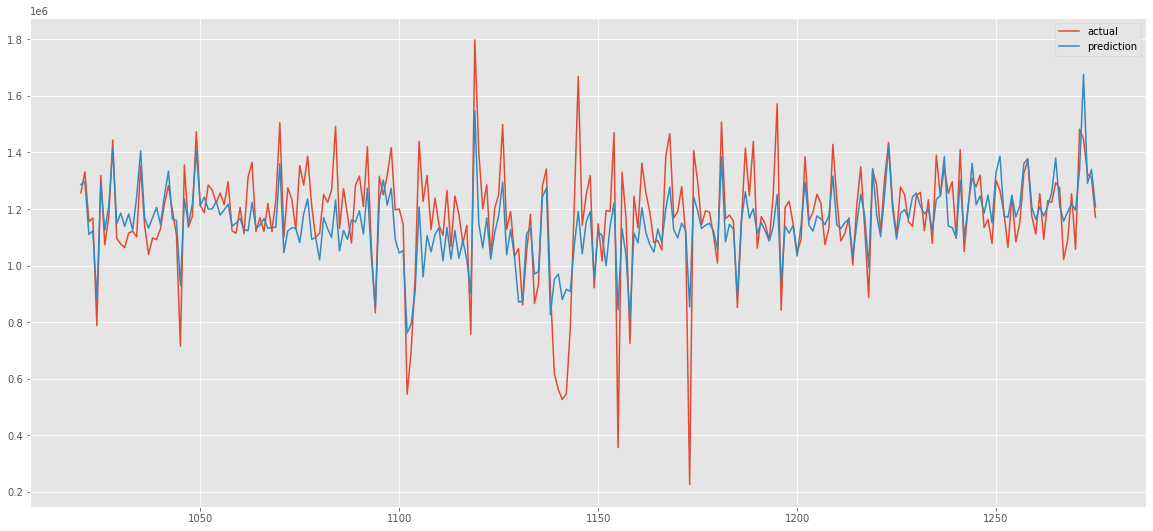

In [116]:
plt.figure(figsize=(20, 9))
plt.plot(y_val, label='actual')
plt.plot(predict_model(final_01, data = X_val)['Label'], label='prediction')
plt.legend()
plt.show()

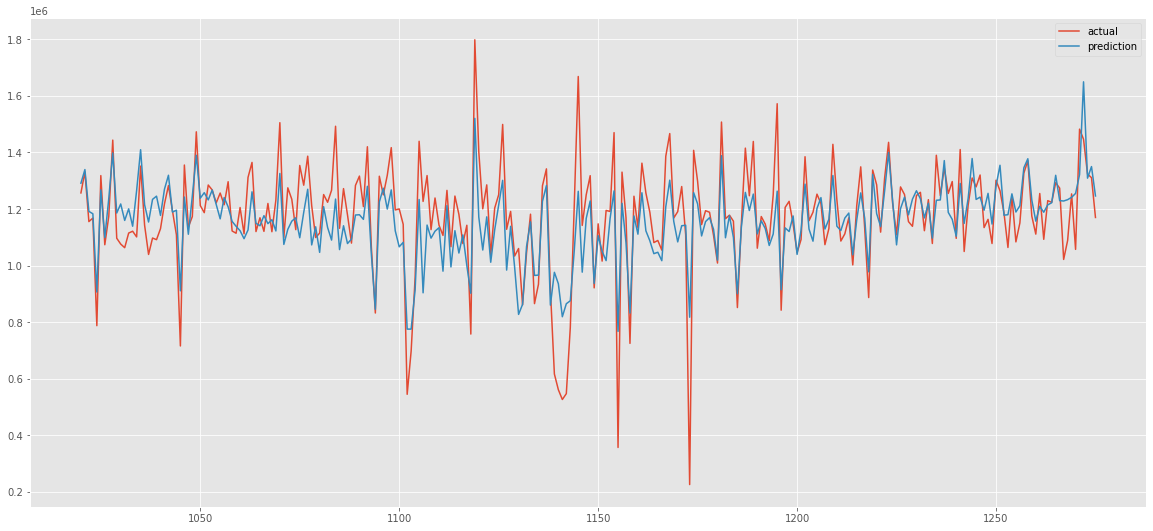

In [117]:
plt.figure(figsize=(20, 9))
plt.plot(y_val, label='actual')
plt.plot(predict_model(final_02, data = X_val)['Label'], label='prediction')
plt.legend()
plt.show()

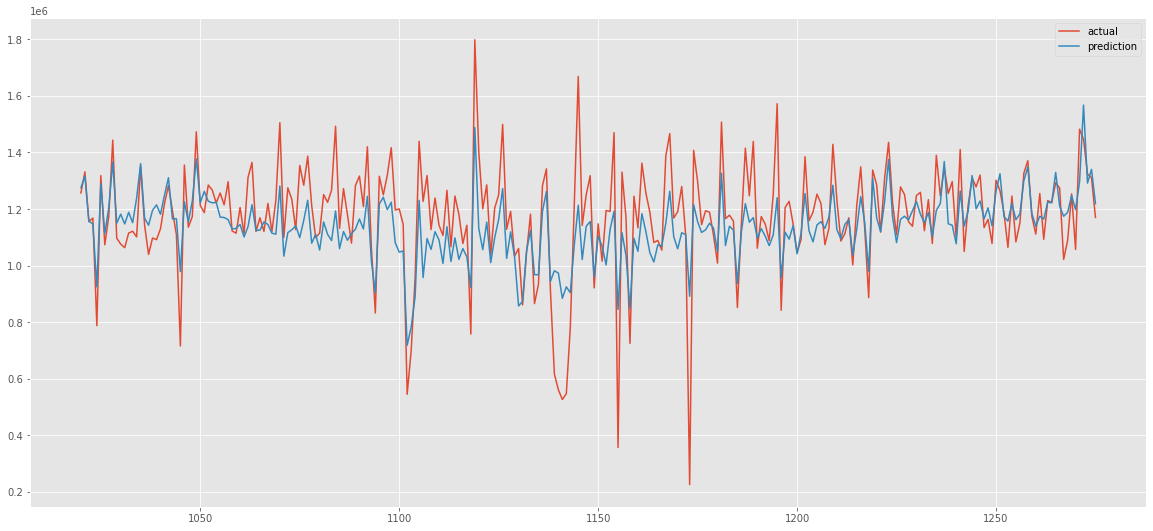

In [115]:
plt.figure(figsize=(20, 9))
plt.plot(y_val, label='actual')
plt.plot(predict_model(final_03, data = X_val)['Label'], label='prediction')
plt.legend()
plt.show()